# **Madrid Restaurant review reviewer**

**Content**
- Load data
- Initial EDA
- Classify restaurants
- Obtain review #

# **Load data**

In [2]:
import zipfile
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()

# Name of the zip file and the CSV file inside it
zip_file_name = 'data.zip'
csv_file_name = 'Madrid_reviews.csv'

# Path to the zip file
zip_file_path = os.path.join(current_directory, zip_file_name)

# Extract and read the CSV file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


# Set this new column as the index of df
df.set_index(df['restaurant_name'] + '_' + df['review_id'].astype(str), inplace=True)

# Display the first few rows of the DataFrame
(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/johanbarreiro/Documents/GitHub/NLP/data.zip'

## Data quality

In [ ]:
df.shape

(176848, 13)

In [ ]:
len(df['restaurant_name'].unique())

5855

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176848 entries, Sushi_Yakuza_review_731778139 to Los_Montes_de_Galicia_review_587494831
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       176848 non-null  int64 
 1   parse_count      176848 non-null  int64 
 2   restaurant_name  176848 non-null  object
 3   rating_review    176848 non-null  int64 
 4   sample           176848 non-null  object
 5   review_id        176848 non-null  object
 6   title_review     176847 non-null  object
 7   review_preview   176848 non-null  object
 8   review_full      176848 non-null  object
 9   date             176848 non-null  object
 10  city             176848 non-null  object
 11  url_restaurant   176848 non-null  object
 12  author_id        176848 non-null  object
dtypes: int64(3), object(10)
memory usage: 18.9+ MB


In [ ]:
df.isna().sum()

Unnamed: 0         0
parse_count        0
restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       1
review_preview     0
review_full        0
date               0
city               0
url_restaurant     0
author_id          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

# **Initial EDA**

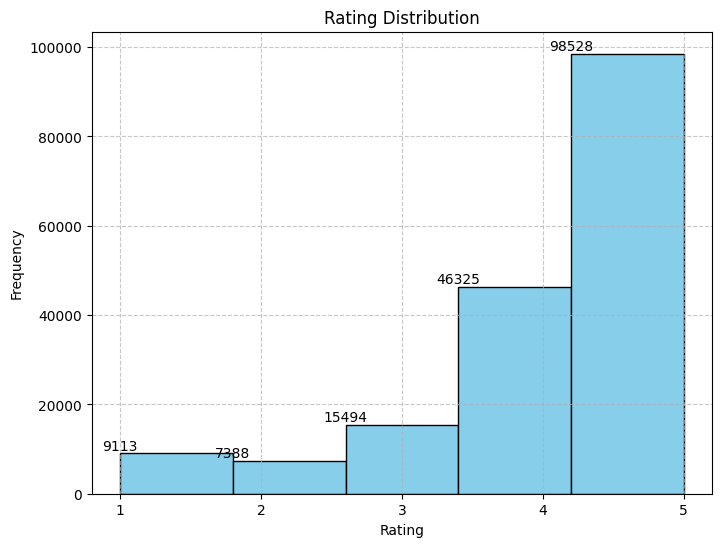

In [ ]:
import matplotlib.pyplot as plt

# Rating Distribution (Histogram)
plt.figure(figsize=(8, 6))
hist, bins, _ = plt.hist(df['rating_review'], bins=5, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True, linestyle='--', alpha=0.7)

# Adding count labels
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

plt.show()


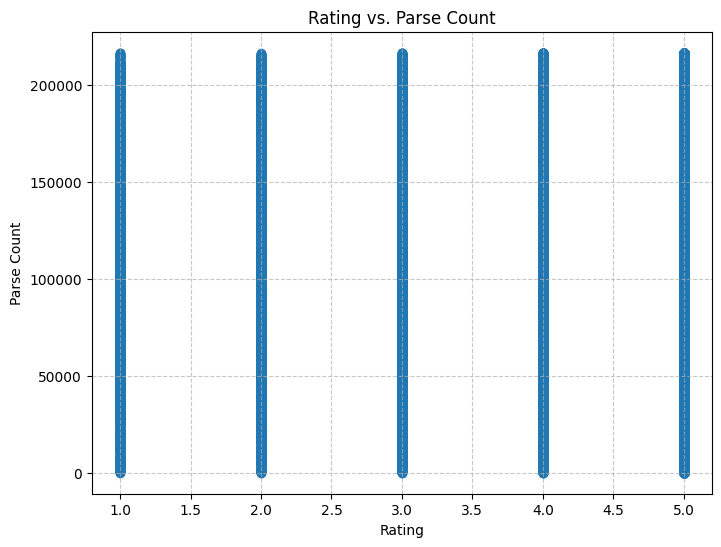

In [ ]:
# Rating vs. Parse Count (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['rating_review'], df['parse_count'], alpha=0.5)
plt.title('Rating vs. Parse Count')
plt.xlabel('Rating')
plt.ylabel('Parse Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


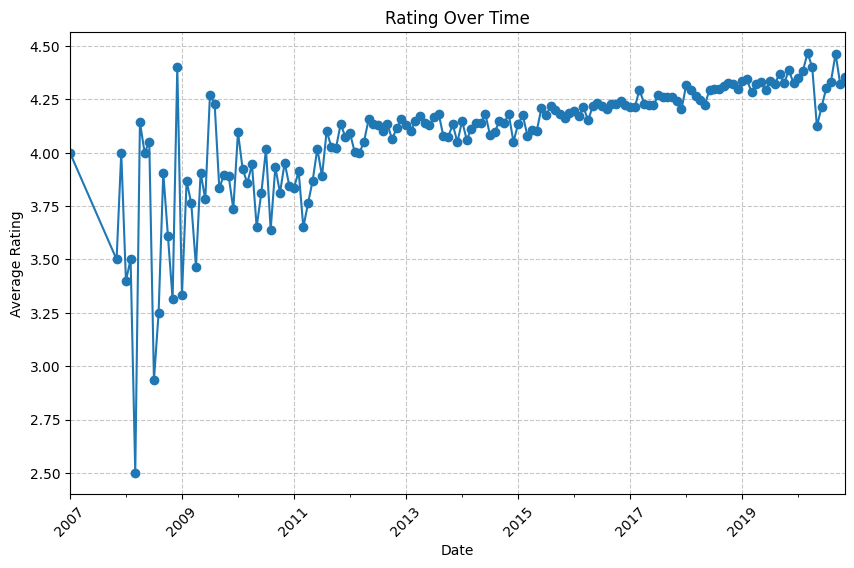

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Rating Over Time (Line Plot)
plt.figure(figsize=(10, 6))
df.groupby(df['date'].dt.to_period('M'))['rating_review'].mean().plot(marker='o')
plt.title('Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


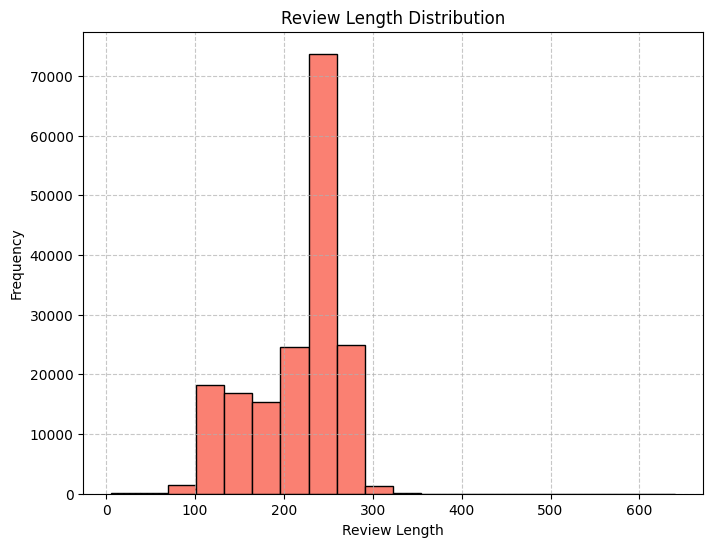

In [ ]:
# Review Length Distribution (Histogram)
review_lengths = df['review_preview'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=20, color='salmon', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


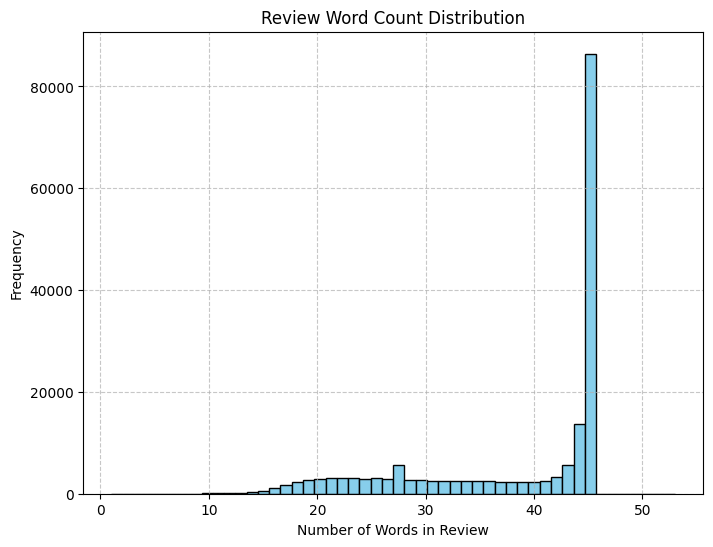

In [ ]:
# Review Length Distribution (Histogram) in words
review_word_counts = df['review_preview'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
plt.hist(review_word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Review Word Count Distribution')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
Sushi_Yakuza_review_731778139,0,1,Sushi_Yakuza,4,Positive,review_731778139,Good sushi option,"The menu of Yakuza is a bit of a lottery, some...","The menu of Yakuza is a bit of a lottery, some...",2019-12-10,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
Azotea_Forus_Barcelo_review_766657436,10,11,Azotea_Forus_Barcelo,1,Negative,review_766657436,Light up your table at night,Check your bill when you cancel just in case y...,Check your bill when you cancel just in case y...,2020-08-23,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
Level_Veggie_Bistro_review_749493592,11,12,Level_Veggie_Bistro,5,Positive,review_749493592,Delicious,I had the yuca profiteroles and the veggie bur...,I had the yuca profiteroles and the veggie bur...,2020-03-06,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
Sto_Globo_Sushi_Room_review_772422246,12,13,Sto_Globo_Sushi_Room,5,Positive,review_772422246,Loved this place,A friend recommended this place as one of the ...,A friend recommended this place as one of the ...,2020-09-29,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
Azotea_Forus_Barcelo_review_761855600,13,14,Azotea_Forus_Barcelo,5,Positive,review_761855600,Amazing terrace in madrid,Amazing terrace in madrid - great atmosphere a...,Amazing terrace in madrid - great atmosphere a...,2020-07-27,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


### Feature Engineering

Adding features to the df
- Sentiment of the review
- Emotion of the review
- Sentiment shift in the review
- Number of stop words used
- Lenght of review
- Stop word use to lenght of review
- Precence of URL
- Exclamation mark usage
- Punctuation usage
- ~~ Redability Score
- Number of keywords used

Defining functions to do the new features

In [ ]:
import numpy as np
import re
import string
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex
from nltk.corpus import stopwords
import nltk

def feature_eng(df):
    # Download stopwords
    nltk.download('stopwords')
    stop_words_english = set(stopwords.words('english'))
    stop_words_spanish = set(stopwords.words('spanish'))
    stop_words = stop_words_english.union(stop_words_spanish)

    # Initialize sentiment analyzer
    vader_analyzer = SentimentIntensityAnalyzer()

    # Function to analyze sentiment
    def analyze_sentiment(text):
        vader_scores = vader_analyzer.polarity_scores(text)
        blob = TextBlob(text)
        return vader_scores['neg'], vader_scores['neu'], vader_scores['pos'], vader_scores['compound'], blob.sentiment.polarity, blob.sentiment.subjectivity

    # Function to analyze emotions
    def analyze_emotions(text):
        emotion = NRCLex(text)
        emotion_scores = emotion.raw_emotion_scores
        # Normalize the emotion scores to ensure they are in a consistent format
        total_scores = sum(emotion_scores.values())
        if total_scores > 0:
            emotion_scores = {k: v / total_scores for k, v in emotion_scores.items()}
        return emotion_scores

    # Function to compute sentiment shift
    def sentiment_shift(text):
        sentences = TextBlob(text).sentences
        if len(sentences) < 2:
            return 0  # Not enough sentences to compute a shift

        vader_scores = [vader_analyzer.polarity_scores(str(sentence))['compound'] for sentence in sentences]
        shifts = np.diff(vader_scores)  # Compute the difference between consecutive sentiment scores
        sentiment_shift_value = np.mean(np.abs(shifts))  # Average of the absolute sentiment shifts
        return sentiment_shift_value

    # Function to add additional features
    def additional_features(text):
        length = len(text)  # Length of the post
        words = text.split()  # Split the text into words
        num_stop_words = sum(1 for word in words if word.lower() in stop_words)  # Number of stop words used in the post
        stop_words_ratio = num_stop_words / length if length > 0 else 0  # Ratio of stop words used in the post
        num_exclamations = text.count('!')  # Number of exclamation marks used in the post
        num_punctuation = sum(1 for char in text if char in string.punctuation)  # Number of punctuation marks used in the post
        url_present = bool(re.search(r'http[s]?://', text))  # Check if a URL is present in the post
        return length, num_stop_words, stop_words_ratio, num_exclamations, num_punctuation, url_present

    # Function to get the most common words excluding stop words
    def get_most_common_words(text_series, n=350):
        all_words = ' '.join(text_series).lower().split()
        word_counts = Counter(all_words)
        most_common_words = [word for word, count in word_counts.most_common(n) if word not in stop_words]
        return most_common_words

    # Function to count keywords in a review
    def count_keywords(text, keywords):
        words = re.findall(r'\b\w+\b', text.lower())
        keyword_count = sum(word in keywords for word in words)
        return keyword_count

    # Apply sentiment analysis
    sentiment_results = df['review_full'].apply(lambda x: analyze_sentiment(x))
    df[['negative', 'neutral', 'positive', 'overall_sentiment', 'blob_polarity', 'blob_subjectivity']] = pd.DataFrame(sentiment_results.tolist(), index=df.index)

    # Apply sentiment shift
    df['sentiment_shift'] = df['review_full'].apply(lambda x: sentiment_shift(x))

    # Apply additional features
    additional_features_results = df['review_full'].apply(lambda x: additional_features(x))
    df[['review_length', 'num_stop_words', 'stop_words_ratio', 'num_exclamations', 'num_punctuation', 'url_present']] = pd.DataFrame(additional_features_results.tolist(), index=df.index)

    # Get the 200 most common words
    most_common_words = get_most_common_words(df['review_full'])

    # Apply keyword count
    df['keyword_count'] = df['review_full'].apply(lambda x: count_keywords(x, most_common_words))

    # Apply emotion analysis
    emotion_results = df['review_full'].apply(lambda x: analyze_emotions(x))

    # Convert emotion results to DataFrame and handle missing values
    emotion_df = pd.DataFrame(emotion_results.tolist()).fillna(0)

    # Add an identifier column to emotion_df
    emotion_df['index'] = df.index

    # Make sure the columns of emotion_df are properly prefixed
    emotion_df.columns = [f'emotion_{col}' if col != 'index' else col for col in emotion_df.columns]

    # Set the index of df to be the same as the original index for merging
    df = df.reset_index()

    # Merge the emotion DataFrame with the original DataFrame on the index
    df = df.merge(emotion_df, left_on='index', right_on='index', how='left')

    # word_count
    df['word_count'] = df['review_full'].apply(lambda x: len(str(x).split()))
    df['word_count'] = df['review_full'].apply(lambda x: len(str(x).split()))

    # unique_word_count
    df['unique_word_count'] = df['review_full'].apply(lambda x: len(set(str(x).split())))
    df['unique_word_count'] = df['review_full'].apply(lambda x: len(set(str(x).split())))

    # mean_word_length
    df['mean_word_length'] = df['review_full'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['mean_word_length'] = df['review_full'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

    # hashtag_count
    df['hashtag_count'] = df['review_full'].apply(lambda x: len([c for c in str(x) if c == '#']))
    df['hashtag_count'] = df['review_full'].apply(lambda x: len([c for c in str(x) if c == '#']))

    # mention_count
    df['mention_count'] = df['review_full'].apply(lambda x: len([c for c in str(x) if c == '@']))
    df['mention_count'] = df['review_full'].apply(lambda x: len([c for c in str(x) if c == '@']))

    # Drop the index column as it's no longer needed
    df = df.drop(columns=['index'])

    return df

In [ ]:
df = feature_eng(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carloslopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id,negative,neutral,positive,overall_sentiment,blob_polarity,blob_subjectivity,sentiment_shift,review_length,num_stop_words,stop_words_ratio,num_exclamations,num_punctuation,url_present,keyword_count,emotion_anticipation,emotion_joy,emotion_positive,emotion_surprise,emotion_trust,emotion_anger,emotion_disgust,emotion_fear,emotion_negative,emotion_sadness,word_count,unique_word_count,mean_word_length,hashtag_count,mention_count
0,0,1,Sushi_Yakuza,4,Positive,review_731778139,Good sushi option,"The menu of Yakuza is a bit of a lottery, some...","The menu of Yakuza is a bit of a lottery, some...",2019-12-10,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_0,0.059,0.756,0.185,0.9076,0.400000,0.657143,0.129700,392,39,0.099490,0,9,False,13,0.176471,0.058824,0.235294,0.058824,0.058824,0.058824,0.058824,0.117647,0.117647,0.058824,75,55,4.240000,0,0
1,10,11,Azotea_Forus_Barcelo,1,Negative,review_766657436,Light up your table at night,Check your bill when you cancel just in case y...,Check your bill when you cancel just in case y...,2020-08-23,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_1,0.243,0.712,0.045,-0.8472,-0.382812,0.550000,0.427067,205,20,0.097561,3,4,False,5,0.000000,0.083333,0.166667,0.083333,0.000000,0.083333,0.000000,0.166667,0.250000,0.166667,38,35,4.368421,0,0
2,11,12,Level_Veggie_Bistro,5,Positive,review_749493592,Delicious,I had the yuca profiteroles and the veggie bur...,I had the yuca profiteroles and the veggie bur...,2020-03-06,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_2,0.000,0.634,0.366,0.9391,0.500000,0.625000,0.412750,191,18,0.094241,1,4,False,6,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,32,26,5.000000,0,0
3,12,13,Sto_Globo_Sushi_Room,5,Positive,review_772422246,Loved this place,A friend recommended this place as one of the ...,A friend recommended this place as one of the ...,2020-09-29,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_3,0.000,0.779,0.221,0.9630,0.574375,0.615000,0.441725,448,41,0.091518,1,6,False,20,0.076923,0.230769,0.384615,0.076923,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,85,62,4.270588,0,0
4,13,14,Azotea_Forus_Barcelo,5,Positive,review_761855600,Amazing terrace in madrid,Amazing terrace in madrid - great atmosphere a...,Amazing terrace in madrid - great atmosphere a...,2020-07-27,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_4,0.000,0.489,0.511,0.9571,0.516667,0.616667,0.000000,119,7,0.058824,0,2,False,8,0.166667,0.166667,0.166667,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,21,20,4.714286,0,0


In [ ]:
from nltk.stem import *
from nltk.corpus import stopwords
import re

def process_text(raw_text):

    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    words = letters_only.lower().split()

    stops = set(stopwords.words("english"))
    not_stop_words = [w for w in words if not w in stops]

    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in not_stop_words]

    return( " ".join( stemmed ))

In [21]:
df['clean_text'] = df['review_full'].apply(lambda x: process_text(x))
df.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id,negative,neutral,positive,overall_sentiment,blob_polarity,blob_subjectivity,sentiment_shift,review_length,num_stop_words,stop_words_ratio,num_exclamations,num_punctuation,url_present,keyword_count,emotion_anticipation,emotion_joy,emotion_positive,emotion_surprise,emotion_trust,emotion_anger,emotion_disgust,emotion_fear,emotion_negative,emotion_sadness,word_count,unique_word_count,mean_word_length,hashtag_count,mention_count,clean_text
0,0,1,Sushi_Yakuza,4,Positive,review_731778139,Good sushi option,"The menu of Yakuza is a bit of a lottery, some...","The menu of Yakuza is a bit of a lottery, some...",2019-12-10,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_0,0.059,0.756,0.185,0.9076,0.400000,0.657143,0.129700,392,39,0.099490,0,9,False,13,0.176471,0.058824,0.235294,0.058824,0.058824,0.058824,0.058824,0.117647,0.117647,0.058824,75,55,4.240000,0,0,menu yakuza bit lotteri plate realli good like...
1,10,11,Azotea_Forus_Barcelo,1,Negative,review_766657436,Light up your table at night,Check your bill when you cancel just in case y...,Check your bill when you cancel just in case y...,2020-08-23,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_1,0.243,0.712,0.045,-0.8472,-0.382812,0.550000,0.427067,205,20,0.097561,3,4,False,5,0.000000,0.083333,0.166667,0.083333,0.000000,0.083333,0.000000,0.166667,0.250000,0.166667,38,35,4.368421,0,0,check bill cancel case get extra charg surpris...
2,11,12,Level_Veggie_Bistro,5,Positive,review_749493592,Delicious,I had the yuca profiteroles and the veggie bur...,I had the yuca profiteroles and the veggie bur...,2020-03-06,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_2,0.000,0.634,0.366,0.9391,0.500000,0.625000,0.412750,191,18,0.094241,1,4,False,6,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,32,26,5.000000,0,0,yuca profiterol veggi burger recommend server ...
3,12,13,Sto_Globo_Sushi_Room,5,Positive,review_772422246,Loved this place,A friend recommended this place as one of the ...,A friend recommended this place as one of the ...,2020-09-29,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_3,0.000,0.779,0.221,0.9630,0.574375,0.615000,0.441725,448,41,0.091518,1,6,False,20,0.076923,0.230769,0.384615,0.076923,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,85,62,4.270588,0,0,friend recommend place one best sushi ever tri...
4,13,14,Azotea_Forus_Barcelo,5,Positive,review_761855600,Amazing terrace in madrid,Amazing terrace in madrid - great atmosphere a...,Amazing terrace in madrid - great atmosphere a...,2020-07-27,Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_4,0.000,0.489,0.511,0.9571,0.516667,0.616667,0.000000,119,7,0.058824,0,2,False,8,0.166667,0.166667,0.166667,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,21,20,4.714286,0,0,amaz terrac madrid great atmospher great wine ...


### Word analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carloslopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


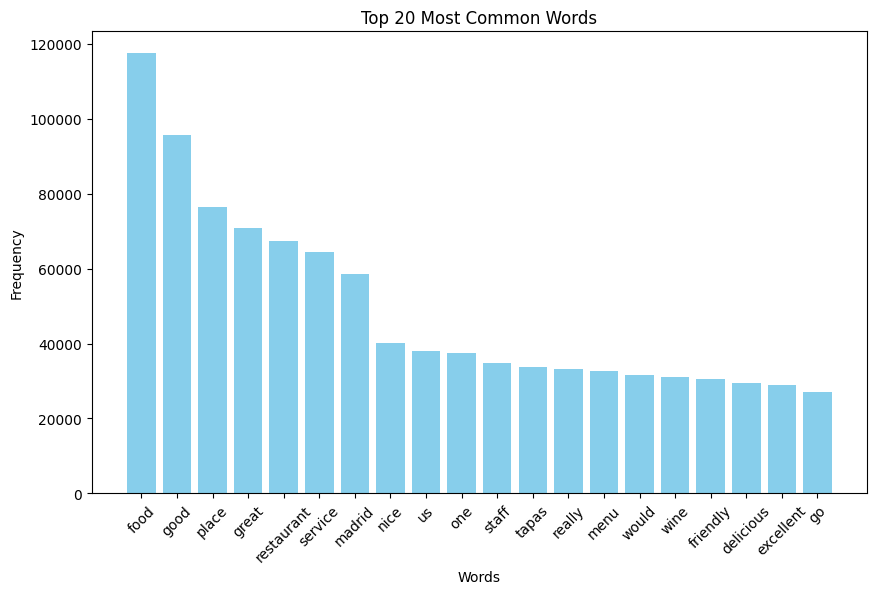

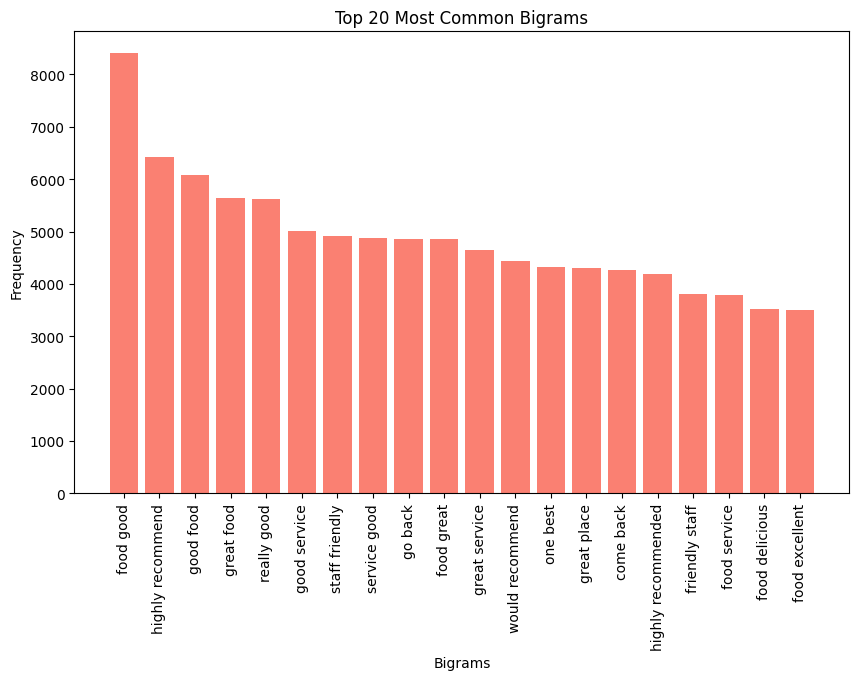

In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.util import ngrams
from wordcloud import WordCloud
import nltk


nltk.download('stopwords')



# Create a copy of the DataFrame for word analysis
df_words = df.copy()

# Preprocess text: tokenize, remove punctuation, and stop words
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df_words['tokens'] = df_words['review_full'].apply(preprocess)

# Word Frequency Analysis
all_tokens = [token for tokens in df_words['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

# Plotting Word Frequency
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Bigram Analysis
def generate_bigrams(text):
    tokens = preprocess(text)
    bigrams = list(ngrams(tokens, 2))
    return [' '.join(bigram) for bigram in bigrams]

df_words['bigrams'] = df_words['review_full'].apply(generate_bigrams)

# Bigram Frequency Analysis
all_bigrams = [bigram for bigrams in df_words['bigrams'] for bigram in bigrams]
bigram_freq = Counter(all_bigrams)
most_common_bigrams = bigram_freq.most_common(20)

# Plotting Bigram Frequency
bigrams, counts = zip(*most_common_bigrams)
plt.figure(figsize=(10, 6))
plt.bar(bigrams, counts, color='salmon')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



### Data Splitting

In [ ]:
df.drop(columns=['Unnamed: 0', 'parse_count', 'restaurant_name','review_id', 'title_review', 'review_preview', 'review_full',
       'date', 'city', 'url_restaurant', 'author_id'] , inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["rating_review"])
y = df["rating_review"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Encoding

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer(analyzer = "word")
train_features = count_vect.fit_transform(X_train['clean_text'])
test_features = count_vect.transform(X_test['clean_text'])

tfidf = TfidfTransformer(norm="l2")
train_text_tfidf_features = tfidf.fit_transform(train_features)
test_text_tfidf_features = tfidf.fit_transform(test_features)

In [58]:
# Perform Encoding
df_encoded = pd.get_dummies(df, columns=['sample'])

In [59]:
df_encoded.sample_Negative.replace({True: 1, False: 0}, inplace=True)
df_encoded.sample_Positive.replace({True: 1, False: 0}, inplace=True)
df_encoded.url_present.replace({True: 1, False: 0}, inplace=True)

/var/folders/3w/5qb02px920l26hxbbh9wd81w0000gn/T/ipykernel_13809/2890713174.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded.sample_Negative.replace({True: 1, False: 0}, inplace=True)
/var/folders/3w/5qb02px920l26hxbbh9wd81w0000gn/T/ipykernel_13809/2890713174.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [60]:
def train_and_evaluate_classifier(X, yt, estimator, grid):
    """Train and Evaluate a estimator (defined as input parameter) on the given labeled data using accuracy."""

    # Cross validation
    from sklearn.model_selection import ShuffleSplit
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=estimator, cv=cv,  param_grid=grid, error_score=0.0, n_jobs = -1, verbose = 0)

    # Train the model over and tune the parameters
    print("Training model")
    grid_search.fit(X, yt)

    # CV-score
    print("Best score: %0.3f" % grid_search.best_score_)
    if len(grid) > 0:
        print("Best parameters set:")
        best_parameters = grid_search.best_estimator_.get_params()

    return grid_search

### Model V2

In [62]:
from sklearn.linear_model import LogisticRegression

max_ent_grid= {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
max_ent_cls = train_and_evaluate_classifier(train_text_tfidf_features, y_train, LogisticRegression(), max_ent_grid)

Training model


/Users/carloslopez/Documents/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carloslopez/Documents/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Best score: 0.679
Best parameters set:


/Users/carloslopez/Documents/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model

In [58]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

In [90]:
# The classes must be adjusted for model training and later will be adjusted back for evaluation
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
)

# Define the hyperparameters grid to be randomized over
param_dist = {
    "n_estimators": randint(10, 60),         # Number of boosting stages
    "max_depth": randint(3, 20),             # Maximum depth of the individual trees
    "learning_rate": [0.01, 0.05, 0.1, 0.2], # Learning rate
    "min_child_weight": randint(1, 12),      # Minimum sum of instance weight (hessian) needed in a child
    "subsample": uniform(0.3, 0.6),          # Subsample ratio of the training instances
    "colsample_bytree": uniform(0.3, 0.7),   # Subsample ratio of columns when constructing each tree
    "gamma": uniform(0, 0.5),                # Minimum loss reduction required to make a further partition
    "reg_alpha": uniform(0, 1),              # L1 regularization term on weights
    "reg_lambda": uniform(0, 1)              # L2 regularization term on weights
}

# Initialize RandomizedSearchCV
xg = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=300, cv=5, verbose=1, n_jobs=-1, random_state=42)


In [91]:
# Fit the model
xg.fit(X_train_full, y_train_adjusted)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Users/carloslopez/anaconda3/envs/nlp/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1744b5640>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1744b0410>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x375c66690>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x376534170>},
                   random_state=42, verbose=1)

#### Save the model

In [ ]:
# Saving the model to a file
filename = 'xgFinal.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xg, file)

print(f"Model saved to {filename}")

Load the model

In [ ]:
# Loading the model from the file
filename = 'xgFinal.pkl'
with open(filename, 'rb') as file:
    xg = pickle.load(file)

#### Validation

In [92]:
# Display the best parameters
xg.best_params_

{'colsample_bytree': 0.7845129391858923,
 'gamma': 0.031145899065031346,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 7,
 'n_estimators': 49,
 'reg_alpha': 0.8139702695060188,
 'reg_lambda': 0.6152194382310109,
 'subsample': 0.483752172471967}

In [93]:
# Display the best score
xg.best_score_

0.6883261153155222

In [94]:
# Display the best estimator
proba = xg.predict_proba(X_test)
pred = xg.predict(X_test)

In [95]:
# Checking the scores of the model
accuracy = accuracy_score(y_test_adjusted, pred)
precision_test = precision_score(y_test_adjusted, pred, average="weighted")
recall_test = recall_score(y_test_adjusted, pred, average="weighted")
f1_test = f1_score(y_test_adjusted, pred, average="weighted")
roc_auc_test = roc_auc_score(y_test_adjusted, proba, multi_class="ovr", average="weighted")

# Display the scores
print(f"Test Accuracy: {round(accuracy, 3)}")
print(f"Test Precision: {round(precision_test, 3)}")
print(f"Test Recall: {round(recall_test, 3)}")
print(f"Test F1: {round(f1_test, 3)}")
print(f"Test ROC_AUC: {round(roc_auc_test, 3)}")

Test Accuracy: 0.686
Test Precision: 0.655
Test Recall: 0.686
Test F1: 0.648
Test ROC_AUC: 0.837


In [96]:
means = xg.cv_results_['mean_test_score']
stds = xg.cv_results_['std_test_score']

#### Confusion Matrix

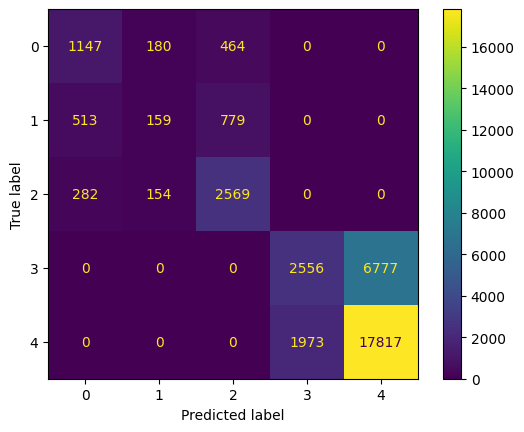

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test_adjusted, pred)

#### Feature Importance

In [98]:
importance = xg.best_estimator_.feature_importances_
feature_names = X_train_full.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

#print(feature_importance)
for i in range(0, len(feature_importance)):
    print(f"{feature_importance.iloc[i, 0]}: {feature_importance.iloc[i, 1]}")

sample_Negative: 0.4696139991283417
sample_Positive: 0.39837002754211426
blob_polarity: 0.02000400237739086
num_exclamations: 0.018162252381443977
overall_sentiment: 0.018151365220546722
positive: 0.010336625389754772
emotion_surprise: 0.008012000471353531
negative: 0.007659486960619688
emotion_anticipation: 0.0053535145707428455
emotion_joy: 0.0038112665060907602
num_stop_words: 0.0037948309909552336
emotion_trust: 0.003049756633117795
emotion_disgust: 0.0030470266938209534
neutral: 0.00288185803219676
review_length: 0.0027734916657209396
emotion_fear: 0.0027351577300578356
emotion_positive: 0.0027220388874411583
blob_subjectivity: 0.002662274055182934
emotion_sadness: 0.0024693103041499853
emotion_negative: 0.002422104589641094
keyword_count: 0.002419000957161188
stop_words_ratio: 0.0024156321305781603
emotion_anger: 0.002386570442467928
num_punctuation: 0.0023810788989067078
sentiment_shift: 0.002365364460274577
url_present: 0.0


#### Hyperparameter tuning

In [99]:
# Get the best hyperparameters and model
best_params = xg.best_params_
best_model = xg.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test_adjusted)

Best Hyperparameters:
colsample_bytree: 0.7845129391858923
gamma: 0.031145899065031346
learning_rate: 0.2
max_depth: 6
min_child_weight: 7
n_estimators: 49
reg_alpha: 0.8139702695060188
reg_lambda: 0.6152194382310109
subsample: 0.483752172471967


In [101]:
# Best set of hyperparameters
best_params = {
    'colsample_bytree': 0.7845129391858923,
    'gamma': 0.031145899065031346,
    'learning_rate':0.2,
    'max_depth': 6,
    'min_child_weight': 7,
    'n_estimators': 49,
    'reg_alpha': 0.8139702695060188,
    'reg_lambda': 0.6152194382310109,
    'subsample': 0.483752172471967
}

# Initialize the XGBoost classifier with the best parameters
xgb_model = xgb.XGBClassifier(
    random_state=99, 
    use_label_encoder=False, 
    eval_metric='logloss',
    scale_pos_weight= 5,#(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),  # Adjust this based on your data
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    n_estimators=best_params['n_estimators'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    subsample=best_params['subsample']
)

# Fit the model
xgb_model.fit(X_train_full, y_train_adjusted)


/Users/carloslopez/anaconda3/envs/nlp/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [20:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7845129391858923, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.031145899065031346, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=49,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

##### Validation

In [103]:
# Display the best estimator
proba = xgb_model.predict_proba(X_test)
pred = xgb_model.predict(X_test)

In [104]:
# Checking the scores of the model
accuracy = accuracy_score(y_test_adjusted, pred)
precision_test = precision_score(y_test_adjusted, pred, average="weighted")
recall_test = recall_score(y_test_adjusted, pred, average="weighted")
f1_test = f1_score(y_test_adjusted, pred, average="weighted")
roc_auc_test = roc_auc_score(y_test_adjusted, proba, multi_class="ovr", average="weighted")

# Display the scores
print(f"Test Accuracy: {round(accuracy, 3)}")
print(f"Test Precision: {round(precision_test, 3)}")
print(f"Test Recall: {round(recall_test, 3)}")
print(f"Test F1: {round(f1_test, 3)}")
print(f"Test ROC_AUC: {round(roc_auc_test, 3)}")

Test Accuracy: 0.685
Test Precision: 0.654
Test Recall: 0.685
Test F1: 0.647
Test ROC_AUC: 0.836


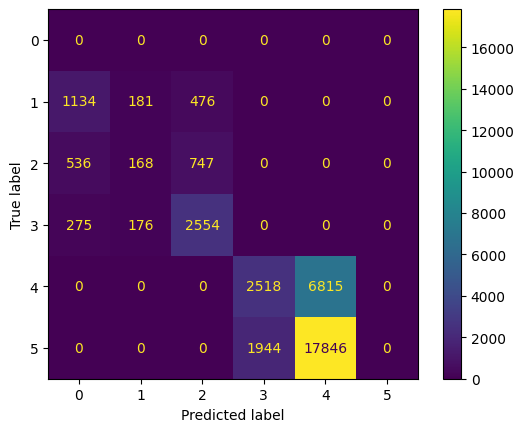

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

##### Save the model `Best Model` after hyperparameter tuning

In [106]:
# Saving the model to a file
filename = 'xgFinal.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved to {filename}")

Model saved to xgFinal.pkl


### **Review classification**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# Make a copy of the original DataFrame
ml_df = df.copy()

# Remove stop words
stop_words = ENGLISH_STOP_WORDS
ml_df['review_full'] = ml_df['review_full'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ml_df['review_full'])
y = ml_df['rating_review']

# Train-Test Split with stratification and return indices
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, ml_df.index, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)




Accuracy: 0.5668080294034492
Precision: 0.44527862844697075
Recall: 0.5668080294034492
F1-score: 0.427387982735267


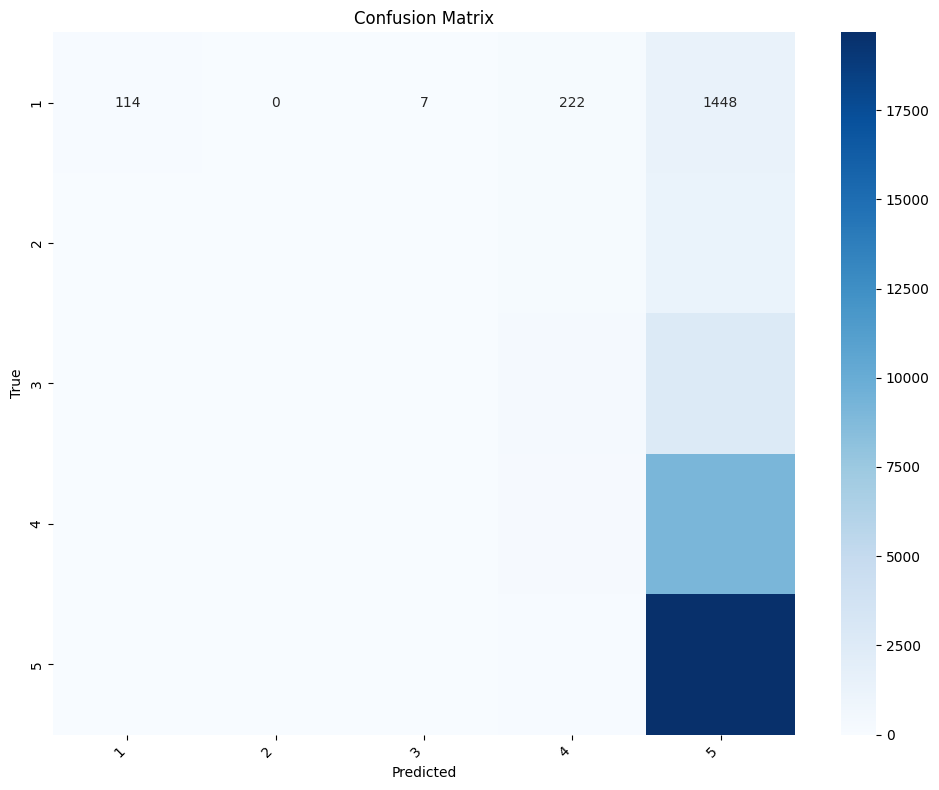

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Get unique class labels
class_labels = sorted(ml_df['rating_review'].unique())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

c:\Users\Jorge\anaconda3\envs\ContigoDigital\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


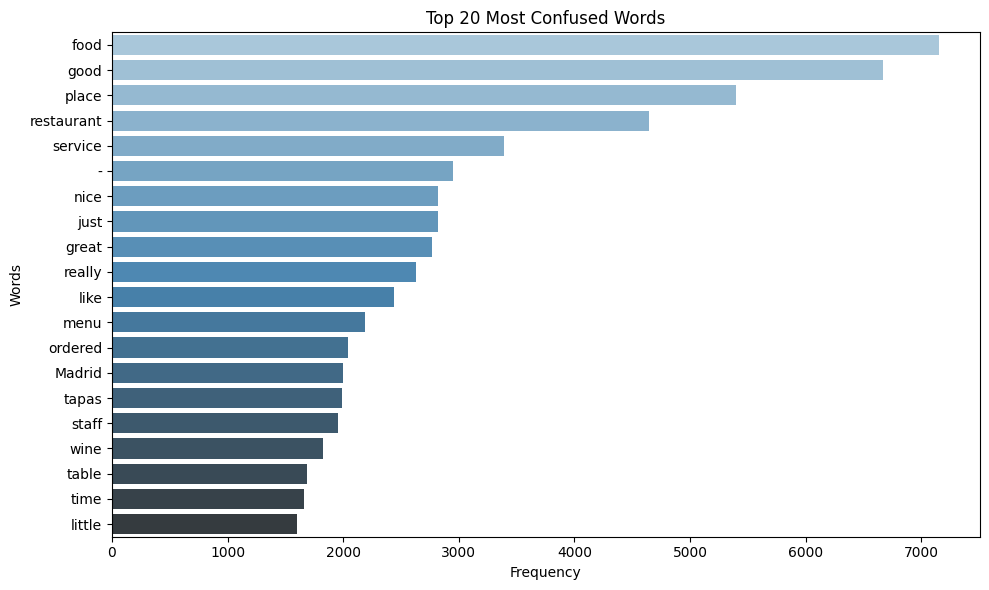

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get misclassified samples
misclassified_samples_index = y_test[y_test != y_pred].index
misclassified_samples = ml_df.loc[misclassified_samples_index]

# Combine misclassified samples into a single string
misclassified_text = ' '.join(misclassified_samples['review_full'])

# Tokenize the misclassified text
misclassified_words = misclassified_text.split()

# Count the occurrences of each word
word_counts = {}
for word in misclassified_words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

# Sort the words by frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Visualize the top 20 most confused words
top_confused_words = sorted_word_counts[:20]
confused_words, counts = zip(*top_confused_words)

# Convert counts to integers
counts = [int(count) for count in counts]

# Convert confused_words to a list of strings
confused_words = list(confused_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=confused_words, palette='Blues_d')
plt.title('Top 20 Most Confused Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


##### Results review

In [44]:
# Create a DataFrame with original indices, y_test, and y_pred
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, index=test_index)

# Reset index to make it a column
results_df = results_df.reset_index()

# Rename the new column to 'restaurant_name'
results_df = results_df.rename(columns={'index': 'restaurant_name'})

# Remove everything after '_review' in the 'restaurant_name' column
results_df['restaurant_name'] = results_df['restaurant_name'].str.replace('_review.*', '', regex=True)



In [45]:
results_df

,restaurant_name,y_test,y_pred
0,Restaurante_Marina_Ventura,4,5
1,Los_Montes_de_Galicia,5,5
2,Cerveceria_100_montaditos,4,5
3,Hattori_Hanzo,1,5
4,De_Maria_Preciados,4,5
...,...,...,...
35365,Restaurante_La_Malontina,5,5
35366,The_Frank_Tavern,4,5
35367,Mercado_de_San_Miguel,5,5
35368,Taberna_el_Sur,5,5


In [46]:
restaurant_model_review = results_df.groupby('restaurant_name').mean().reset_index()


restaurant_model_review


,restaurant_name,y_test,y_pred
0,0_Gluten,5.000000,5.000000
1,100_Montaditos,4.068966,5.000000
2,100_Montaditos_Princesa,4.200000,4.800000
3,101_vinos,4.500000,5.000000
4,127_Taipei_Bar_Ramen_Baos,4.000000,5.000000
...,...,...,...
3784,Zen_Market,3.928571,4.928571
3785,Zenith_Brunch_Cocktails,4.984127,5.000000
3786,Zielou,3.000000,4.500000
3787,Zoko_Madrid,3.333333,3.666667


In [48]:
restaurant_model_review[restaurant_model_review['restaurant_name']=='Restaurante_Marina_Ventura']


,restaurant_name,y_test,y_pred
3027,Restaurante_Marina_Ventura,4.457627,4.915254


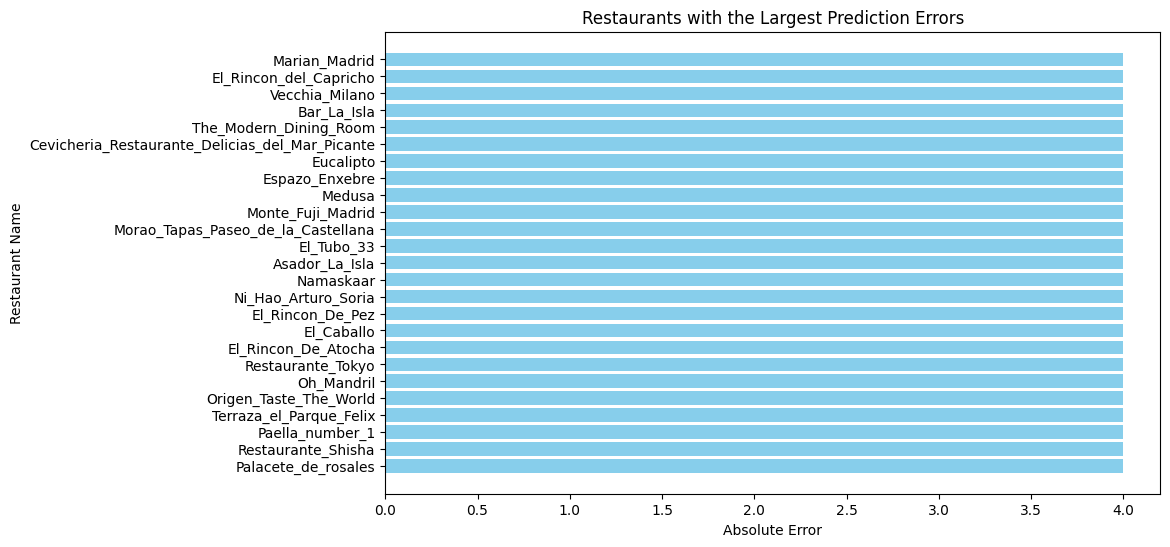

In [54]:
# Calculate the absolute error
restaurant_model_review['error'] = abs(restaurant_model_review['y_test'] - restaurant_model_review['y_pred'])

# Sort by error in descending order
restaurant_model_review_sorted = restaurant_model_review.sort_values(by='error', ascending=False)

# Limit to top 15 results
top_15_errors = restaurant_model_review_sorted.head(25)

# Plot the largest errors
plt.figure(figsize=(10, 6))
plt.barh(top_15_errors['restaurant_name'], top_15_errors['error'], color='skyblue')
plt.xlabel('Absolute Error')
plt.ylabel('Restaurant Name')
plt.title('Restaurants with the Largest Prediction Errors')
plt.gca().invert_yaxis()  # Invert y-axis to show largest errors at the top
plt.show()